In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [31]:
df=pd.read_csv(r"../data/attrition_data_with_calculated_columns.csv")
df.drop(['EMP_ID', 'TERMINATION_YEAR', 'ANNUAL_RATE', 'COMBINED_JOB_GROUP', 'DISCRETIZED_ANNUAL_RATE', 'DISCRETIZED_AGE', 'PREVYR_1_PRESENT', 'PREVYR_2_PRESENT', 'PREVYR_3_PRESENT', 'PREVYR_4_PRESENT', 'PREVYR_5_PRESENT', 'employee_cnt', 'white_rate', 'asian_rate', 'black_rate', 'hispa_rate'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [32]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [33]:
x = pd.get_dummies(x, columns=['REFERRAL_SOURCE', 'ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [34]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [36]:
rf_model = RandomForestClassifier(random_state=5,max_depth=15,n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7444521497919556


In [37]:
parameters = {"max_depth": [5,10,15,20], "n_estimators": [50,80,100,120], "random_state": [5]}
gridsearchcat  = GridSearchCV(rf_model, parameters,cv=4,verbose=3)
gridsearchcat.fit(x_train, y_train)
y_pred = gridsearchcat.predict(x_test)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=5, n_estimators=50, random_state=5 ....................
[CV]  max_depth=5, n_estimators=50, random_state=5, score=0.686, total=   0.2s
[CV] max_depth=5, n_estimators=50, random_state=5 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, n_estimators=50, random_state=5, score=0.665, total=   0.2s
[CV] max_depth=5, n_estimators=50, random_state=5 ....................
[CV]  max_depth=5, n_estimators=50, random_state=5, score=0.674, total=   0.1s
[CV] max_depth=5, n_estimators=50, random_state=5 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=5, n_estimators=50, random_state=5, score=0.668, total=   0.1s
[CV] max_depth=5, n_estimators=80, random_state=5 ....................
[CV]  max_depth=5, n_estimators=80, random_state=5, score=0.675, total=   0.2s
[CV] max_depth=5, n_estimators=80, random_state=5 ....................
[CV]  max_depth=5, n_estimators=80, random_state=5, score=0.663, total=   0.3s
[CV] max_depth=5, n_estimators=80, random_state=5 ....................
[CV]  max_depth=5, n_estimators=80, random_state=5, score=0.672, total=   0.2s
[CV] max_depth=5, n_estimators=80, random_state=5 ....................
[CV]  max_depth=5, n_estimators=80, random_state=5, score=0.666, total=   0.2s
[CV] max_depth=5, n_estimators=100, random_state=5 ...................
[CV]  max_depth=5, n_estimators=100, random_state=5, score=0.680, total=   0.3s
[CV] max_depth=5, n_estimators=100, random_state=5 ...................
[CV]  max_depth=5, n_estimators=100, random_state=5, score=0.662, total=   0.3s
[CV] max_depth=5, n

[CV]  max_depth=20, n_estimators=100, random_state=5, score=0.727, total=   0.7s
[CV] max_depth=20, n_estimators=100, random_state=5 ..................
[CV]  max_depth=20, n_estimators=100, random_state=5, score=0.722, total=   0.5s
[CV] max_depth=20, n_estimators=120, random_state=5 ..................
[CV]  max_depth=20, n_estimators=120, random_state=5, score=0.721, total=   0.8s
[CV] max_depth=20, n_estimators=120, random_state=5 ..................
[CV]  max_depth=20, n_estimators=120, random_state=5, score=0.711, total=   0.7s
[CV] max_depth=20, n_estimators=120, random_state=5 ..................
[CV]  max_depth=20, n_estimators=120, random_state=5, score=0.722, total=   0.7s
[CV] max_depth=20, n_estimators=120, random_state=5 ..................
[CV]  max_depth=20, n_estimators=120, random_state=5, score=0.724, total=   0.7s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   23.9s finished


In [38]:
print(accuracy_score(y_pred,y_test))

0.7368238557558946


In [39]:
gridsearchcat.best_params_

{'max_depth': 20, 'n_estimators': 100, 'random_state': 5}

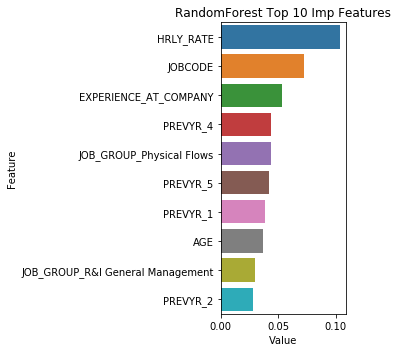

In [40]:
feature_imp = pd.DataFrame(sorted(zip(rf_model.feature_importances_,x.columns)), columns=['Value','Feature'])
feature_imp_top_10 = feature_imp.sort_values(by = 'Value',ascending=False).reset_index(drop=True)[:10]
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp_top_10)
plt.title('RandomForest Top 10 Imp Features')
plt.tight_layout()
plt.savefig('RandomForest ROC', dpi=150)
plt.show()

In [41]:
y_pred_prob = rf_model.predict_proba(x_test)[:, 1]

<Figure size 432x288 with 0 Axes>

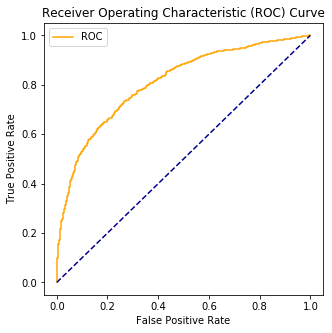

In [42]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)
plt.savefig('RandomForestROC', dpi=150)

In [43]:
confusion_matrix(y_test, y_pred)

array([[1342,  283],
       [ 476,  783]])